In [15]:
from graphNN_hic_likelihood import *
import matplotlib.pyplot as plt

In [3]:
torch.cuda.is_available()

True

In [4]:
device = 'cuda'

In [5]:
train_graphs, train_names, vali_graphs, vali_names, train_loader, vali_loader = \
read_data(
        ["../dataset/train_data_madeup"],
        device=device,
        converage_required_flag=True,
        debug_flag=DEBUG)


Data Loading...
Number of data Loaded: 240
Number of training set: 192
Number of validation set: 48
Number of train data combined: 192
Number of vali data combined: 48


Building training graphs... 
  batch_size: 32
Building vali graphs... 
  batch_size: 32


In [5]:
train_graphs

[DataBatch(x=[455, 74], edge_index=[2, 762], edge_attr=[762, 5], truth=[3565, 4], edge_index_test=[2, 3565], new_node_idx_to_original_idx=[455], batch=[455], ptr=[33]),
 DataBatch(x=[489, 74], edge_index=[2, 883], edge_attr=[883, 5], truth=[4111, 4], edge_index_test=[2, 4111], new_node_idx_to_original_idx=[489], batch=[489], ptr=[33]),
 DataBatch(x=[476, 74], edge_index=[2, 829], edge_attr=[829, 5], truth=[3864, 4], edge_index_test=[2, 3864], new_node_idx_to_original_idx=[476], batch=[476], ptr=[33]),
 DataBatch(x=[398, 74], edge_index=[2, 593], edge_attr=[593, 5], truth=[2805, 4], edge_index_test=[2, 2805], new_node_idx_to_original_idx=[398], batch=[398], ptr=[33]),
 DataBatch(x=[470, 74], edge_index=[2, 819], edge_attr=[819, 5], truth=[3830, 4], edge_index_test=[2, 3830], new_node_idx_to_original_idx=[470], batch=[470], ptr=[33]),
 DataBatch(x=[413, 74], edge_index=[2, 584], edge_attr=[584, 5], truth=[2760, 4], edge_index_test=[2, 2760], new_node_idx_to_original_idx=[413], batch=[413

In [5]:
dataset = CompressedHicFragDataSet(["../dataset/train_data_madeup"], 
                                   coverage_required_flag=True, 
                                   madeup_flag=True, debug_flag=True)

In [6]:
dataset

CompressedHicFragDataSet: 20 samples.

In [7]:
hicMx, fragID, scaffID, \
        names, nFrags, frag_lens, \
        distance_mx, likelihood_mx, frag_coverage, \
        frag_start_loc_relative, frag_masss_center_relative, \
        frag_average_density_global, frag_average_hic_interaction, coverage_flag, \
        repeat_density_flag, frag_repeats_density, total_len_in_pixel = next(iter(dataset))

In [13]:
hicMx.shape, fragID.shape, scaffID.shape

(torch.Size([4, 1024, 1024]), torch.Size([1024]), torch.Size([1024]))

In [8]:
fragID

tensor([14,  8,  7,  ...,  0,  0,  0])

In [14]:
names, nFrags, frag_lens.shape

('chm13_1_normal_numCuts3_numRepeat44', 19, torch.Size([1024]))

In [15]:
frag_lens.shape

torch.Size([1024])

In [19]:
nFrags

19

In [20]:
frag_lens

tensor([156., 464., 111.,  ...,   0.,   0.,   0.])

In [21]:
distance_mx.shape, likelihood_mx.shape, frag_coverage.shape

(torch.Size([2048, 2048]), torch.Size([2048, 2048]), torch.Size([1024]))

In [22]:
frag_start_loc_relative.shape, frag_masss_center_relative.shape

(torch.Size([1024]), torch.Size([1024, 2]))

In [23]:
frag_average_density_global.shape, frag_average_hic_interaction.shape, coverage_flag

(torch.Size([1024, 64]), torch.Size([1024, 1024]), True)

In [24]:
repeat_density_flag, frag_repeats_density.shape, total_len_in_pixel

(True, torch.Size([1024]), tensor(13033, dtype=torch.int32))

In [28]:
fragID.shape, scaffID.shape

(torch.Size([1024]), torch.Size([1024]))

In [6]:
one_sample_path = f"../dataset/train_data_madeup/{train_names[0][0]}"

In [7]:
one_sample = train_graphs[0][0].cpu()
one_sample

Data(x=[15, 74], edge_index=[2, 23], edge_attr=[23, 5], truth=[105, 4], edge_index_test=[2, 105], new_node_idx_to_original_idx=[15])

In [8]:
vali_sample = vali_graphs[0][0]
vali_sample

Data(x=[19, 74], edge_index=[2, 37], edge_attr=[37, 5], truth=[171, 4], edge_index_test=[2, 171], new_node_idx_to_original_idx=[19])

In [9]:
mod, optimizer, _, _ = restore_model("../trained_model/likelihood_graph_madeup", 'cuda')

Initializing model...

Restored: ../trained_model/likelihood_graph_madeup/checkpoint_20241015-23:43.pth
Epoch: 1000
Loss_train: 5.0059e-03
Loss_vali: 1.0253e-01



In [10]:
device = torch.device("cuda")

In [11]:
mod = mod.to(device)

In [12]:
vali_res = mod.forward(vali_sample)
vali_sample.truth

tensor([[1.0000, 1.0000, 1.0000, 1.0000],
        [0.0139, 0.0054, 0.0259, 0.0173],
        [1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000],
        [0.0000, 0.0054, 0.0120, 0.0173],
        [1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000],
        [0.0671, 0.0480, 0.0791, 0.0600],
        [1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000],
        [0.0120, 0.0382, 0.0000, 0.0262],
        [1.0000, 1.0000, 1.0000, 1.0000],
        [0.0671, 0.1006, 0.0791, 0.1126],
        [0.0480, 0.0139, 0.0600, 0.0259],
        [1.0000, 1.0000, 1.0000, 1.0000],
        [0.0256, 0.0000, 0.0612, 0.0356],
        [0.0433, 0.1213, 0.0077, 0.0857],
        [1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000, 1

In [13]:
vali_res

tensor([[0.9987, 0.9995, 0.9976, 0.9983],
        [0.0544, 0.0526, 0.0537, 0.0536],
        [0.9996, 1.0002, 0.9986, 0.9993],
        [1.0007, 1.0017, 0.9992, 0.9997],
        [0.0227, 0.0215, 0.0229, 0.0230],
        [1.0076, 1.0083, 1.0083, 1.0082],
        [1.0058, 1.0061, 1.0050, 1.0052],
        [0.0578, 0.0558, 0.0573, 0.0569],
        [1.0011, 1.0008, 1.0006, 1.0012],
        [0.9970, 0.9979, 0.9958, 0.9966],
        [1.0074, 1.0085, 1.0090, 1.0086],
        [0.9995, 0.9999, 0.9988, 0.9995],
        [1.0020, 1.0023, 1.0011, 1.0015],
        [1.0046, 1.0056, 1.0059, 1.0056],
        [0.0395, 0.0377, 0.0394, 0.0392],
        [0.9944, 0.9942, 0.9939, 0.9951],
        [0.1654, 0.1637, 0.1637, 0.1637],
        [0.0547, 0.0534, 0.0544, 0.0545],
        [1.0008, 1.0014, 0.9997, 1.0003],
        [0.0712, 0.0721, 0.0642, 0.0666],
        [0.1447, 0.1458, 0.1383, 0.1404],
        [0.9990, 0.9998, 0.9979, 0.9986],
        [0.9891, 0.9889, 0.9886, 0.9880],
        [0.9989, 0.9993, 0.9983, 0

In [14]:
vali_res.shape, vali_sample

(torch.Size([171, 4]),
 Data(x=[19, 74], edge_index=[2, 37], edge_attr=[37, 5], truth=[171, 4], edge_index_test=[2, 171], new_node_idx_to_original_idx=[19]))

In [14]:
((vali_sample.truth<0.5) != (vali_res<0.5)).sum()

tensor(0, device='cuda:0')

In [15]:
res = mod.forward(train_graphs[0][0])

In [16]:
res.shape

torch.Size([36, 4])

In [17]:
one_sample.truth.shape

torch.Size([36, 4])

In [19]:
one_sample.truth

tensor([[1.0000, 1.0000, 1.0000, 1.0000],
        [0.1118, 0.0348, 0.1761, 0.0991],
        [1.0000, 1.0000, 1.0000, 1.0000],
        [0.0643, 0.0840, 0.0000, 0.0197],
        [0.0348, 0.0000, 0.0991, 0.0643],
        [1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000],
        [0.1761, 0.1958, 0.0991, 0.1189],
        [0.0770, 0.1118, 0.0000, 0.0348],
        [1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000, 1

In [16]:
import pandas as pd

In [23]:
batchnorm_df = pd.read_csv(
    "../trained_model/likelihood_graph_madeup/batchnorm.checkpoint_20241016-11:30.csv"
)

batchnorm_df['train_mse_num'] = [float(x.replace('tensor(', '').split(',')[0])
                                 for x in batchnorm_df['train_mse']]
batchnorm_df['vali_mse_num'] = [float(x.replace('tensor(', '').split(',')[0])
                                 for x in batchnorm_df['vali_mse']]

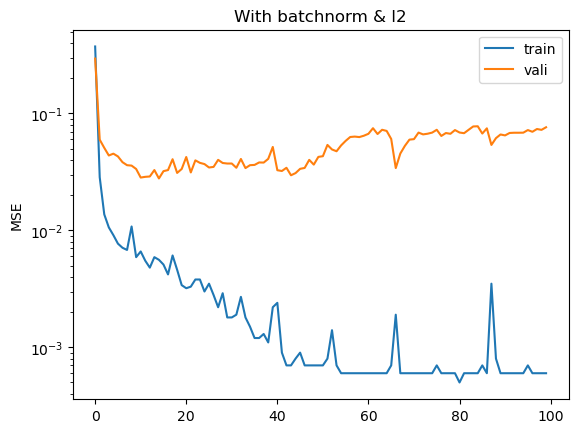

In [38]:
plt.plot(batchnorm_df.index, batchnorm_df['train_mse_num'], label='train')
plt.plot(batchnorm_df.index, batchnorm_df['vali_mse_num'], label='vali')
plt.legend()
plt.title("With batchnorm & l2")
plt.ylabel("MSE")
plt.yscale("log")

/tmp/ipykernel_3883918/1952240394.py:13: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim([0, 0.5])


(0.05716251674692049, 0.5)

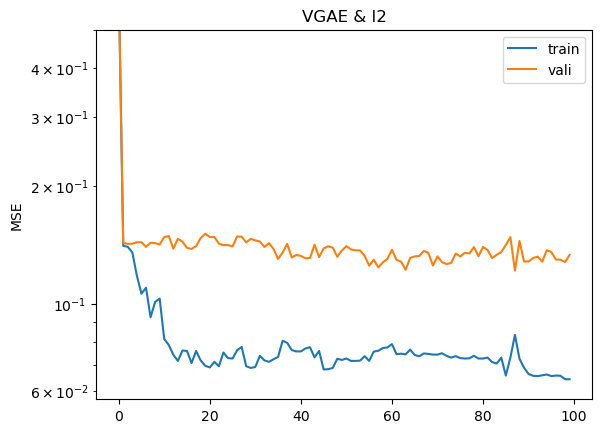

In [48]:
vae_df = pd.read_csv("../trained_model/likelihood_graph_madeup/vgae.checkpoint_20241016-11:53.csv")
vae_df['train_mse_num'] = [float(x.replace('tensor(', '').split(',')[0])
                                 for x in vae_df['train_mse']]
vae_df['vali_mse_num'] = [float(x.replace('tensor(', '').split(',')[0])
                                 for x in vae_df['vali_mse']]

plt.plot(vae_df.index, vae_df['train_mse_num'], label='train')
plt.plot(vae_df.index, vae_df['vali_mse_num'], label='vali')
plt.legend()
plt.title("VGAE & l2")
plt.ylabel("MSE")
plt.yscale("log")
plt.ylim([0, 0.5])

/tmp/ipykernel_3883918/732770841.py:13: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim([0, 0.5])


(0.00036623721979245723, 0.5)

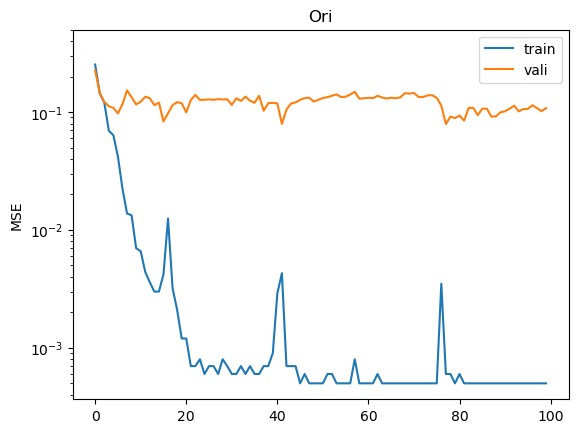

In [47]:
ori_df = pd.read_csv("../trained_model/likelihood_graph_madeup/nobatchnorm_nol2.checkpoint_20241016-13:00.csv")
ori_df['train_mse_num'] = [float(x.replace('tensor(', '').split(',')[0])
                                 for x in ori_df['train_mse']]
ori_df['vali_mse_num'] = [float(x.replace('tensor(', '').split(',')[0])
                                 for x in ori_df['vali_mse']]

plt.plot(ori_df.index, ori_df['train_mse_num'], label='train')
plt.plot(ori_df.index, ori_df['vali_mse_num'], label='vali')
plt.legend()
plt.title("Ori")
plt.ylabel("MSE")
plt.yscale("log")
plt.ylim([0, 0.5])

/tmp/ipykernel_3883918/364792708.py:13: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim([0, 0.5])


(0.008341278626111238, 0.5)

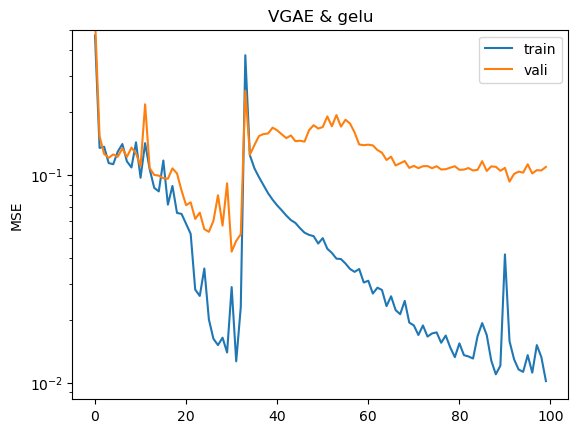

In [61]:
vae_df = pd.read_csv("../trained_model/likelihood_graph_madeup/vgae_nobatchnorm_noactivation.checkpoint_20241016-15:40.csv")
vae_df['train_mse_num'] = [float(x.replace('tensor(', '').split(',')[0])
                                 for x in vae_df['train_mse']]
vae_df['vali_mse_num'] = [float(x.replace('tensor(', '').split(',')[0])
                                 for x in vae_df['vali_mse']]

plt.plot(vae_df.index, vae_df['train_mse_num'], label='train')
plt.plot(vae_df.index, vae_df['vali_mse_num'], label='vali')
plt.legend()
plt.title("VGAE & gelu")
plt.ylabel("MSE")
plt.yscale("log")
plt.ylim([0, 0.5])

/tmp/ipykernel_3883918/95260213.py:9: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axes[0].set_ylim([0, 0.5])
/tmp/ipykernel_3883918/95260213.py:17: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axes[2].set_ylim([0, 0.5])
/tmp/ipykernel_3883918/95260213.py:25: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axes[1].set_ylim([0, 0.5])


(0.00036623721979245723, 0.5)

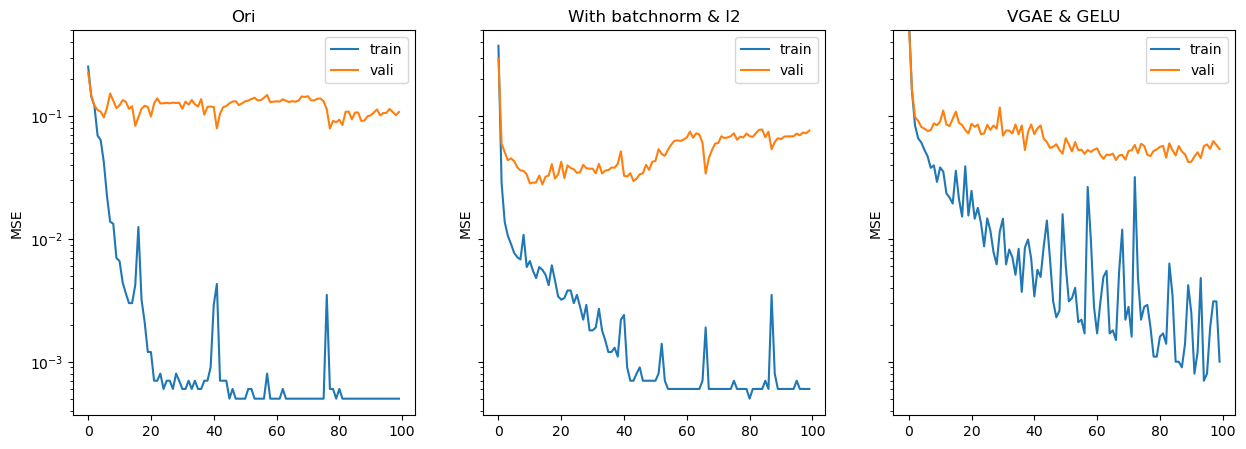

In [60]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

axes[0].plot(ori_df.index, ori_df['train_mse_num'], label='train')
axes[0].plot(ori_df.index, ori_df['vali_mse_num'], label='vali')
axes[0].legend()
axes[0].set_title("Ori")
axes[0].set_ylabel("MSE")
axes[0].set_yscale("log")
axes[0].set_ylim([0, 0.5])

axes[2].plot(vae_df.index, vae_df['train_mse_num'], label='train')
axes[2].plot(vae_df.index, vae_df['vali_mse_num'], label='vali')
axes[2].legend()
axes[2].set_title("VGAE & GELU")
axes[2].set_ylabel("MSE")
axes[2].set_yscale("log")
axes[2].set_ylim([0, 0.5])

axes[1].plot(batchnorm_df.index, batchnorm_df['train_mse_num'], label='train')
axes[1].plot(batchnorm_df.index, batchnorm_df['vali_mse_num'], label='vali')
axes[1].legend()
axes[1].set_title("With batchnorm & l2")
axes[1].set_ylabel("MSE")
axes[1].set_yscale("log")
axes[1].set_ylim([0, 0.5])